In [1]:
#import the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import the Dataset
tsla = pd.read_csv('TSLA.csv')

In [3]:
tsla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [4]:
#my aim is to predict the closing price of the trade based on the opening price, highest price, lowest price and trading volume

In [5]:
#check the dataset for duplicates and null values
tsla.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
tsla.duplicated().sum()

0

In [8]:
#take the vitals of the data
tsla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [9]:
tsla.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035003,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [10]:
tsla.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [11]:
#split the data into x and y (where y is your label)
x = tsla[['Open', 'High', 'Low','Volume']]

In [13]:
y = tsla ['Close']

In [14]:
#split the data into the training and testing set
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lm = LinearRegression()

In [18]:
#fit the model
lm.fit(X_train, y_train)

LinearRegression()

In [19]:
lm.intercept_

-0.022419265138978517

In [20]:
lm.coef_

array([-6.24455052e-01,  9.24563206e-01,  6.98257442e-01, -4.77367951e-08])

In [24]:
DataFrame = pd.DataFrame(lm.coef_, x.columns, columns = ['coef'])

In [25]:
DataFrame

,coef
Open,-6.244551e-01
High,9.245632e-01
Low,6.982574e-01
Volume,-4.773680e-08


In [26]:
predictions = lm.predict(X_test)

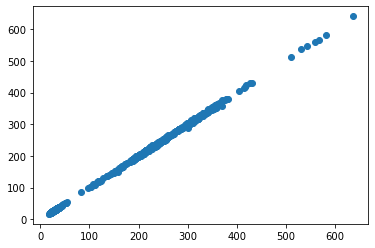

In [27]:
plt.scatter(predictions, y_test)

In [28]:
lm.score(X_test, y_test)

0.9997158377616766

In [31]:
comparison = pd.DataFrame ({'predicted_value': predictions, 'actual_value' : y_test })

In [33]:
comparison.head()

,predicted_value,actual_value
245,26.979503,26.500000
1514,212.356905,213.979996
674,36.523078,36.650002
428,34.999994,34.740002
1251,261.383826,261.890015


In [34]:
lm.predict([[15, 17, 19, 2000]])

array([19.59512539])